In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# (1) load_digits : 손글씨를 분류해 봅시다

## (2) 데이터 준비

In [2]:
digits = load_digits()

## (3) 데이터 이해하기

In [3]:
# 어떤 정보들이 담겼는지 확인
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
# Feature Data 지정하기
digits_data = digits.data
print(digits_data.shape)
digits_data[0]

(1797, 64)


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
# Lable Data 지정하기
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
# Target Names 출력해보기
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


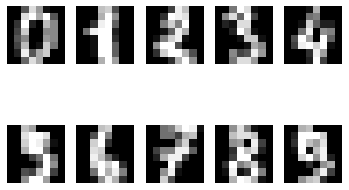

In [7]:
# 이미지 확인하기
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

## (4) train, test 데이터 분리

In [8]:
# 데이터셋을 pandas가 제공하는 DataFrame 이라는 자료형으로 변환
digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [9]:
# 정답데이터 컬럼 추가
digits_df["label"] = digits.target
digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [10]:
# train, test set 나누기
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=40)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  1437 , X_test 개수:  360


In [11]:
# train set 확인
print("train set 확인\n",X_train.shape, y_train.shape)

# test set 확인
print("test set 확인\n", X_test.shape, y_test.shape)

# y 확인
print('y\n',y_train,'\n', y_test)

train set 확인
 (1437, 64) (1437,)
test set 확인
 (360, 64) (360,)
y
 [9 6 1 ... 7 3 3] 
 [8 1 9 0 3 3 2 7 3 9 0 4 0 6 7 6 7 3 5 0 1 8 5 2 0 6 4 1 7 5 5 8 4 2 6 4 8
 9 7 5 5 9 8 4 2 2 3 5 0 0 1 9 1 9 1 2 6 4 5 1 8 4 8 0 7 6 3 9 4 4 3 2 7 4
 7 6 2 9 5 4 1 8 9 1 2 4 3 4 3 1 2 5 0 0 7 1 1 6 7 0 8 2 5 1 1 5 2 1 2 1 4
 4 4 8 9 6 6 3 6 4 1 8 8 3 7 6 2 1 1 2 9 8 4 9 9 3 7 7 6 9 1 6 2 4 5 8 0 5
 4 4 3 2 7 9 7 6 2 2 9 7 2 6 6 5 2 1 8 1 7 4 3 8 9 4 1 7 6 1 1 0 4 4 8 1 4
 0 0 7 3 0 7 9 0 1 0 3 0 9 6 9 6 8 1 0 1 8 3 4 7 8 9 9 8 8 4 1 6 5 5 1 1 3
 9 6 2 3 6 2 6 6 8 4 1 8 9 8 6 3 2 5 1 3 2 0 1 0 8 1 9 6 6 9 9 4 3 6 0 9 1
 9 4 7 7 8 1 3 7 6 9 4 2 7 7 8 5 7 7 1 5 3 3 5 9 8 5 4 9 0 4 8 7 3 7 6 8 6
 8 2 2 0 8 7 3 8 4 1 2 7 6 4 1 1 2 0 8 1 1 9 2 3 9 4 6 0 0 1 3 3 5 9 7 2 2
 8 5 9 2 2 0 3 3 7 3 9 9 2 5 5 4 1 3 0 9 7 5 2 9 5 2 1]


## (5) 다양한 모델로 학습시켜보기

분류기 정의

In [12]:
cls_dt = DecisionTreeClassifier(random_state=40)
cls_rf = RandomForestClassifier(random_state=40)
cls_svm = svm.SVC()
cls_sgd = SGDClassifier()
cls_lr = LogisticRegression()

분류기 결과 저장

In [13]:
model_name = ['Decision Tree', 'Random Forest', 'SVM', 'SGD', 'Logistic'] # 분류기 이름
model_list = [cls_dt, cls_rf, cls_svm, cls_sgd, cls_lr]                   # 분류기 List

results = {} # 학습된 분류기에 Test데이터로 평가한 결과 모음
for name, model in zip(model_name, model_list):
    y_pred = model.fit(X_train, y_train).predict(X_test)                    # 학습과 예측을 동시에 진행
    results[name] = classification_report(y_test, y_pred, output_dict=True) # Test결과 
    print(f'{name} Finished')

Decision Tree Finished
Random Forest Finished
SVM Finished
SGD Finished
Logistic Finished


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


결과 중 필요한 부분만 추출

Accuracy, Macro Average 중 Precision, Recall, F1-score만 사용

In [14]:
data = {}
for name, score in results.items():
    data[name] = {'accuracy' : score['accuracy'], **score['macro avg']} # 딕셔너리 자료형 합치기(merge) 
    del data[name]['support']  # Support 요소 삭제
df_result = pd.DataFrame(data).T # index와 column 바꾸기(전치행렬)
df_result

,accuracy,precision,recall,f1-score
Decision Tree,0.825000,0.829162,0.831750,0.829843
Random Forest,0.975000,0.975370,0.975169,0.974900
SVM,0.991667,0.993061,0.991944,0.992425
SGD,0.961111,0.965834,0.964856,0.964385
Logistic,0.963889,0.966413,0.967177,0.966295


결과 시각화

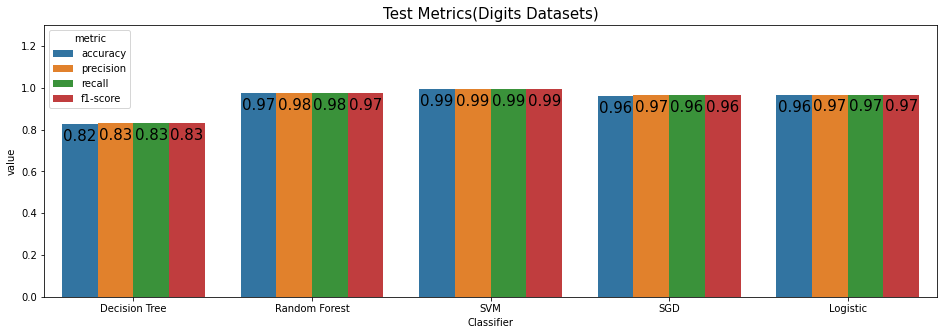

In [15]:
#https://datavizpyr.com/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/ 참고

df_result['name'] = df_result.index # DataFrame의 index를 column에 추가
df_result_melted = df_result.melt(id_vars=['name'], var_name=['metric']) # name을 기준으로 수치들을 모두 한 줄로 정렬
                                                                          # metric 열을 추가해 column의 이름들 정렬
plt.figure(figsize=(16,5))

splot = sns.barplot(x='name', y='value', hue='metric', data=df_result_melted)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'),  # 주석달기
                   (p.get_x() + p.get_width() / 2., p.get_height()), #위치(x, y)
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
    
plt.title('Test Metrics(Digits Datasets)', fontsize=15)
plt.xlabel('Classifier')
plt.ylim(0, 1.3);

## (6) 모델 을 평가해 보기
+ test set의 레이블의 분포가 뷸균형 하지 않다
+ dgits datasets 는 Accuracy를 평가자료로 이용해서 SVM의 정확도가 99%로 높다


# 프로젝트 (2) load_wine : 와인을 분류해 봅시다

## (2) 데이터 준비

In [16]:
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True, as_frame=True)

df_wine = pd.concat([X, y], axis=1)
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## (3) 데이터 이해하기

In [17]:
# Feature Data 지정하기
wine = load_wine()
wine_data = wine.data
print(wine_data.shape)
wine_data[0]

(178, 13)


array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [18]:
# Lable Data 지정하기
wine_label = wine.target
print(wine_label.shape)
wine_label[:20]

(178,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
# Target Names 출력해보기
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [20]:
# Feature Names 출력해보기
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


## (4) train, test 데이터 분리

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
print(f'Size of X_Train : {X_train.shape}')
print(f'Size of y_Train : {y_train.shape}')
print(f'Size of X_Test : {X_test.shape}')
print(f'Size of y_Test : {y_test.shape}')


Size of X_Train : (133, 13)
Size of y_Train : (133,)
Size of X_Test : (45, 13)
Size of y_Test : (45,)


In [22]:
 df_wine.describe() #데이터 분포 살피기

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## (5) 다양한 모델로 학습시켜보기

In [23]:
cls_dt = DecisionTreeClassifier(random_state=40)                               # DecisionTree
cls_rf = RandomForestClassifier(max_depth=2, random_state=40)                  # RandomForest
cls_svm = make_pipeline(StandardScaler(), svm.SVC(gamma='auto', random_state=40))  # SVM
cls_lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=40))  # LogisticRegression
cls_sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, \
                                                        tol=1e-3, \
                                                        random_state=40))      # SGDClassifier

# cls_dt = DecisionTreeClassifier(random_state=40)
# cls_rf = RandomForestClassifier(random_state=40)
# cls_svm = svm.SVC(gamma='0.1', random_state=40)
# cls_sgd = SGDClassifier()
# cls_lr = LogisticRegression()

In [24]:


from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

model_name = ['Decision Tree', 'Random Forest', 'SVM', 'SGD', 'Logistic']
model_list = [cls_dt, cls_rf, cls_svm, cls_sgd, cls_lr]
scoring = {
    'acc': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1' : 'f1_macro'}

results = {}
for name, model in zip(model_name, model_list):
    print(f'{name} Finished')
    scores = cross_validate(model, X, y, cv=5, scoring=scoring, return_estimator=True)
    results[name] = scores


Decision Tree Finished
Random Forest Finished
SVM Finished
SGD Finished
Logistic Finished


## 6. 모델을 평가해 보기

return_estimator=True 를 설정하여 각 트레이닝 세트에 맞는 추정량을 유지할 수도 있습니다 .(계산값 다 보여줌)

단일 메트릭을 사용하는 cross_validate 의 예는 다음과 같습니다 .

 >scores = cross_validate(clf, X, y,
...                         scoring='precision_macro', cv=5,
...                         return_estimator=True)
 sorted(scores.keys())
['estimator', 'fit_time', 'score_time', 'test_score']


### scores = cross_validate(model, X, y, cv=5, scoring=scoring, return_estimator=True)
### results[name] = scores 
예시)


{'Decision Tree': {'fit_time': array([0.00399399, 0.00242519, 0.0022738 , 0.0022583 , 0.00233841]),
  'score_time': array([0.00364065, 0.00293016, 0.00286412, 0.00294733, 0.00304794]),
  'estimator': [DecisionTreeClassifier(random_state=40),
   DecisionTreeClassifier(random_state=40),
   DecisionTreeClassifier(random_state=40),
   DecisionTreeClassifier(random_state=40),
   DecisionTreeClassifier(random_state=40)],
  'test_acc': array([0.91666667, 0.83333333, 0.86111111, 0.91428571, 0.82857143]),
  'test_precision': array([0.91880342, 0.86904762, 0.86147186, 0.91851852, 0.84377104]),
  'test_recall': array([0.92857143, 0.81904762, 0.85793651, 0.91137566, 0.85185185]),
  'test_f1': array([0.91636364, 0.82435897, 0.85852312, 0.91398745, 0.83475783])},
  
  
##  cross validaiton 의 평균을 값으로 정한다


##  cross validaiton 의 평균을 값으로 정한다


In [25]:
data = {}
for name, score in results.items():
#     best_idx = scores['test_acc'].argmax()
#     print(name+"\n", score)
#     print(name, score['test_acc'], len(score['test_acc']), type(score['test_acc']))
    data[name] = {
        'accuracy' : score['test_acc'].sum()/len(score['test_acc']),
        'precision' : score['test_precision'].sum()/len(score['test_precision']),
        'recall' : score['test_recall'].sum()/len(score['test_recall']),
        'f1-score' : score['test_f1'].sum()/len(score['test_f1']) }
    
df_result = pd.DataFrame(data).T
df_result

,accuracy,precision,recall,f1-score
Decision Tree,0.870794,0.882322,0.873757,0.869598
Random Forest,0.966667,0.969289,0.969841,0.967556
SVM,0.983333,0.985606,0.983016,0.983504
SGD,0.971905,0.976111,0.973810,0.973109
Logistic,0.983175,0.983434,0.984921,0.983515


(0.0, 1.3)

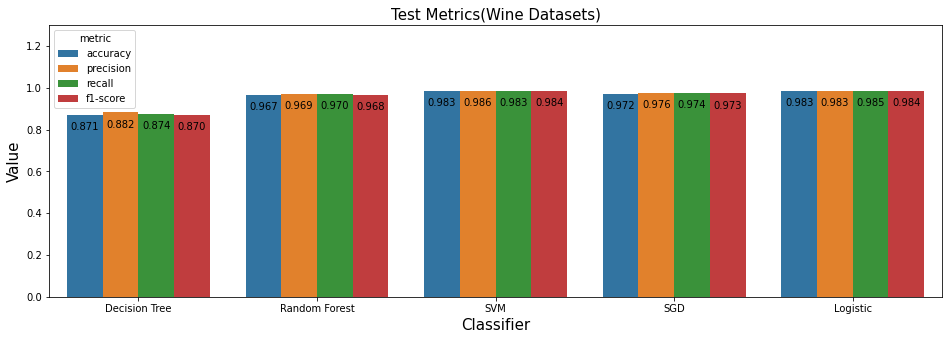

In [26]:
df_result['name'] = df_result.index # DataFrame의 index를 column에 추가
df_result_melted = df_result.melt(id_vars=['name'], var_name=['metric']) # name을 기준으로 수치들을 모두 한 줄로 정렬
                                                                          # metric 열을 추가해 column의 이름들 각각 점수에 매칭

plt.figure(figsize=(16,5))

splot = sns.barplot(x='name', y='value', hue='metric', data=df_result_melted)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
    
plt.title('Test Metrics(Wine Datasets)', fontsize=15)
plt.xlabel('Classifier', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.ylim(0, 1.3)

In [27]:
print('레이블 테스트 데이터 크기: ', y_test.shape)
print('테스트 데이터 세트 레이블의 분포도: ')

print("y_train\n",pd.Series(y_train).value_counts())

print("y_test\n",pd.Series(y_test).value_counts())


레이블 테스트 데이터 크기:  (45,)
테스트 데이터 세트 레이블의 분포도: 
y_train
 1    57
0    46
2    30
Name: target, dtype: int64
y_test
 2    18
1    14
0    13
Name: target, dtype: int64


## (6) 모델을 평가해 보기

+ Wine Datasets도 Digits Datasets과 마찬가지로 Recall과 Precision등의 영향을 받지 않는 데이터이다.

+ 따라서 Wine Datasets은 LogisticRegression 분류기를 사용하면 좋을 것 같다.



# 프로젝트 (3) load_breast_cancer : 유방암 여부를 진단해 봅시다
***
***

## (2) 데이터 준비

In [28]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

df_breast_cancer = pd.concat([X, y], axis=1)
df_breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## (3) 데이터 이해하기

In [29]:
# Feature Data 지정하기
cancer = load_breast_cancer()
cancer_data = cancer.data
print(cancer_data.shape)
cancer_data[0]

(569, 30)


array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [30]:
# Lable Data 지정하기
cancer_label = cancer.target
print(cancer_label.shape)
cancer_label[:20]

(569,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [31]:
# Target Names 출력해보기
print(cancer.target_names)
# Feature Names 출력해보기
print(cancer.feature_names)

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## (4) train, test 데이터 분리

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
print(f'Size of X_Train : {X_train.shape}')
print(f'Size of y_Train : {y_train.shape}')
print(f'Size of X_Test : {X_test.shape}')
print(f'Size of y_Test : {y_test.shape}')

Size of X_Train : (426, 30)
Size of y_Train : (426,)
Size of X_Test : (143, 30)
Size of y_Test : (143,)


In [33]:
 df_breast_cancer.describe() #데이터 분포 살피기

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [34]:
 df_breast_cancer['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

## (5) 다양한 모델로 학습시켜보기

In [35]:
cls_dt = DecisionTreeClassifier(random_state=40)                               # DecisionTree
cls_rf = RandomForestClassifier(max_depth=2, random_state=40)                  # RandomForest
cls_svm = make_pipeline(StandardScaler(), svm.SVC(gamma='auto', random_state=40))  # SVM
cls_lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=40))  # LogisticRegression
cls_sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, \
                                                        tol=1e-3, \
                                                        random_state=40))      # SGDClassifier


In [36]:
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

model_name = ['Decision Tree', 'Random Forest', 'SVM', 'SGD', 'Logistic']
model_list = [cls_dt, cls_rf, cls_svm, cls_sgd, cls_lr]
scoring = {
    'acc': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1' : 'f1_macro'}

results = {}
for name, model in zip(model_name, model_list):
    print(f'{name} Finished')
    scores = cross_validate(model, X, y, cv=5, scoring=scoring, return_estimator=True)
    results[name] = scores


Decision Tree Finished
Random Forest Finished
SVM Finished
SGD Finished
Logistic Finished


## 6. 모델을 평가해 보기

##  cross validaiton 의 평균을 값으로 정한다

In [37]:
data = {}
for name, score in results.items():
#     best_idx = scores['test_acc'].argmax()
#     print(name+"\n", score)
#     print(name, score['test_acc'], len(score['test_acc']), type(score['test_acc']))
    data[name] = {
        'accuracy' : score['test_acc'].sum()/len(score['test_acc']),
        'precision' : score['test_precision'].sum()/len(score['test_precision']),
        'recall' : score['test_recall'].sum()/len(score['test_recall']),
        'f1-score' : score['test_f1'].sum()/len(score['test_f1']) }
    
df_result = pd.DataFrame(data).T
df_result

,accuracy,precision,recall,f1-score
Decision Tree,0.919127,0.914352,0.918283,0.914527
Random Forest,0.956078,0.957405,0.948904,0.952550
SVM,0.973638,0.973487,0.970417,0.971677
SGD,0.963065,0.959602,0.961895,0.960625
Logistic,0.980686,0.982022,0.976913,0.979182


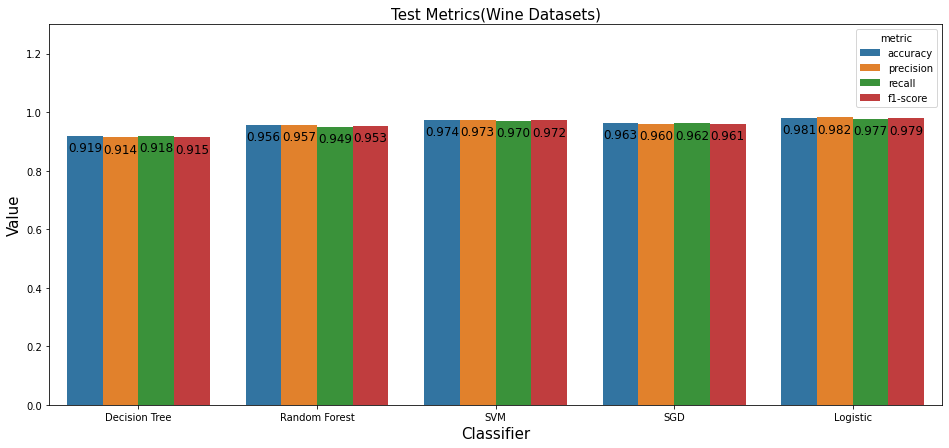

In [38]:
df_result['name'] = df_result.index # DataFrame의 index를 column에 추가
df_result_melted = df_result.melt(id_vars=['name'], var_name=['metric']) # name을 기준으로 수치들을 모두 한 줄로 정렬
                                                                          # metric 열을 추가해 column의 이름들 각각 점수에 매칭

plt.figure(figsize=(16,7))

splot = sns.barplot(x='name', y='value', hue='metric', data=df_result_melted)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
    
plt.title('Test Metrics(Wine Datasets)', fontsize=15)
plt.xlabel('Classifier', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.ylim(0, 1.3);

In [39]:
print('레이블 테스트 데이터 크기: ', y_test.shape)
print('테스트 데이터 세트 레이블의 분포도: ')

print("y_train\n",pd.Series(y_train).value_counts())

print("y_test\n",pd.Series(y_test).value_counts())

레이블 테스트 데이터 크기:  (143,)
테스트 데이터 세트 레이블의 분포도: 
y_train
 1    259
0    167
Name: target, dtype: int64
y_test
 1    98
0    45
Name: target, dtype: int64


(6) 모델을 평가해 보기

+ 편향된 데이터의 예이지만 큰 차이가 나지 않아서 학습이 되었다
+ 의료데이터는 recall 지표가 중요하다
+ FN 의 환자를 줄이고 FP인 환자가 다른 검사로 판별 할 수 있도록 하는게 중요하다
+ recall 값이 가장 큰 Logistic이 적절하다